http://slides.com/profdressel/numpy-and-pandas-overview#/1



In [2]:
import pandas as pd
from sqlalchemy import create_engine # database connection
import datetime as dt
from IPython.display import display

import matplotlib.pyplot as plt
import datetime

In [115]:
# import data form csv file into database
file_name="./598354.csv";
#Initializes database with filename ghcnd.db in the current directory
disk_engine = create_engine('sqlite:///ghcnd.db') 

df=pd.read_csv(file_name, parse_dates=["DATE"]);
df.to_sql('data',disk_engine,if_exists='replace');

In [117]:
pd.read_sql_query('select count(*) from data;', disk_engine)

,count(*)
0,649206


In [118]:
pd.read_sql_query('select * from data limit 3;', disk_engine)

,index,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
0,0,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-01 00:00:00.000000,-9999,-9999,-9999,217,83,-9999
1,1,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-02 00:00:00.000000,-9999,-9999,-9999,217,72,-9999
2,2,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-03 00:00:00.000000,-9999,-9999,-9999,206,78,-9999


<function matplotlib.pyplot.show>

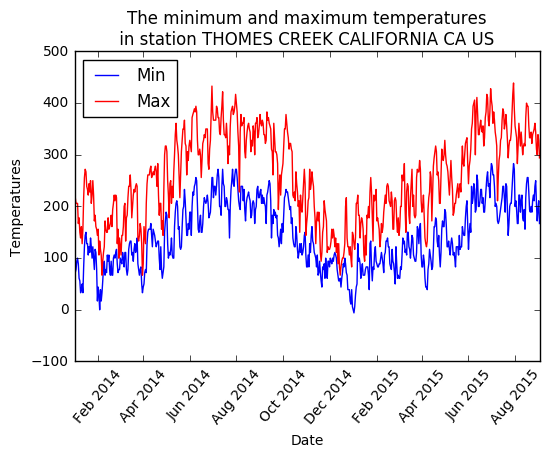

In [119]:
# get the data of station="GHCND:USR0000CTHO"
df=pd.read_sql_query('select date,tmin,tmax from data where station="GHCND:USR0000CTHO" order by date;',disk_engine)

X=pd.to_datetime(df.DATE)

Y1=df.TMIN
Y2=df.TMAX

plt.title("The minimum and maximum temperatures\n in station THOMES CREEK CALIFORNIA CA US ")

plt.plot(X,Y1,color="blue", linewidth=1, linestyle="-", label="Min")
plt.plot(X,Y2, color="red", linewidth=1, linestyle="-", label="Max")
plt.legend(loc='upper left')
# x axis date not overlap
plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Temperatures')

plt.show

<function matplotlib.pyplot.show>

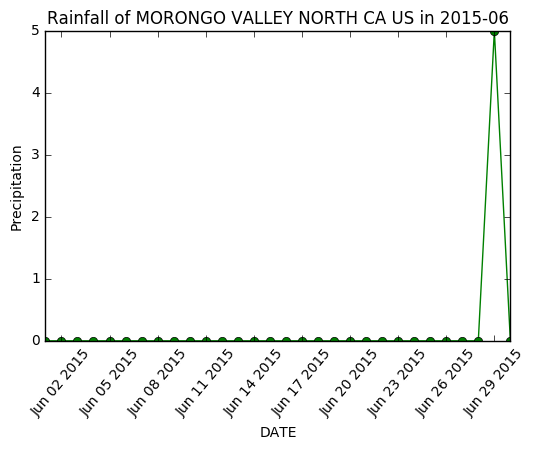

In [120]:
df201506=pd.read_sql_query('select date,prcp from data where station="GHCND:USC00045860" and date like "2015-06%" order by date;',disk_engine)
X=pd.to_datetime(df201506.DATE)
Y=df201506.PRCP

plt.plot_date(X,Y,color="green", linewidth=1, linestyle="-", label="Max")
plt.title("Rainfall of MORONGO VALLEY NORTH CA US in 2015-06")
plt.xlabel("DATE")
plt.ylabel("Precipitation")
plt.xticks(rotation=50)

plt.show

<function matplotlib.pyplot.show>

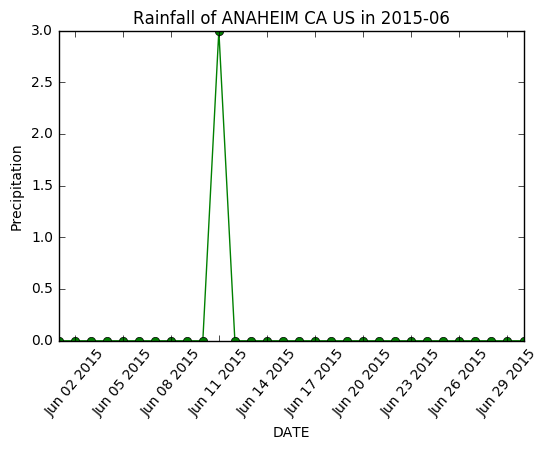

In [121]:
df201506=pd.read_sql_query('select date,prcp from data where station="GHCND:USC00040192" and date like "2015-06%" order by date;',disk_engine)
X=pd.to_datetime(df201506.DATE)
Y=df201506.PRCP

plt.plot_date(X,Y,color="green", linewidth=1, linestyle="-", label="Max")
plt.title("Rainfall of ANAHEIM CA US in 2015-06")
plt.xlabel("DATE")
plt.ylabel("Precipitation")
plt.xticks(rotation=50)

plt.show

In [92]:
pd.read_sql_query('select station,station_name,count(*) cnt from data group by station,station_name order by cnt desc;',disk_engine)



,STATION,STATION_NAME,cnt
0,GHCND:US1CABT0002,OROVILLE 2.7 ENE CA US,610
1,GHCND:US1CAED0017,CAMINO 2.0 WSW CA US,610
2,GHCND:US1CAFR0005,TOLLHOUSE 6.2 SSE CA US,610
3,GHCND:US1CAHM0026,BRIDGEVILLE 5.2 ENE CA US,610
4,GHCND:US1CAKN0001,INYOKERN 9.4 WSW CA US,610
5,GHCND:US1CALA0001,GLENDALE 2.4 WSW CA US,610
6,GHCND:US1CANV0035,GRASS VALLEY 1.3 NNE CA US,610
7,GHCND:US1CAOR0017,MISSION VIEJO 1.6 ENE CA US,610
8,GHCND:US1CARV0002,IDYLLWILD 1.8 NW CA US,610
9,GHCND:US1CASD0004,OCEANSIDE 8.4NE CA US,610
